# Final EDA

In [1]:
%load_ext watermark

In [2]:
%watermark -v -m -p numpy,pandas,sklearn,seaborn,matplotlib -g

/home/hades/anaconda3/envs/test101/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CPython 3.7.3
IPython 7.9.0

numpy 1.18.1
pandas 1.0.3
sklearn 0.22.1
seaborn 0.9.0
matplotlib 3.1.1

compiler   : GCC 7.3.0
system     : Linux
release    : 4.4.0-18362-Microsoft
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : eb9b2b24f054b6caf85f90dd882a77e617ba9c92


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
# random seed
SEED = 61
np.random.seed = SEED

In [5]:
dataurl = './high_diamond_ranked_10min.csv'

In [6]:
data = pd.read_csv(dataurl)
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [7]:
print('Shape Of Data {} by {}'.format(data.shape[0], data.shape[1]))
print('Size of Data > {}'.format(data.size))

Shape Of Data 9879 by 40
Size of Data > 395160


## Reformatting the data that is redundant or not required

In [8]:
# if blue team get first blood, 'blueFirstBlood' will 1, other 0 red team get
data[['redFirstBlood', 'blueFirstBlood']]

,redFirstBlood,blueFirstBlood
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9874,0,1
9875,1,0
9876,1,0
9877,0,1


In [9]:
# 'redCSPerMin' is from 'redTotalMinionsKilled' / 10 min
# 'blueCSPerMin' is from 'blueTotalMinionsKilled' / 10 min
data[['redCSPerMin','redTotalMinionsKilled', 'blueCSPerMin','blueTotalMinionsKilled']]

,redCSPerMin,redTotalMinionsKilled,blueCSPerMin,blueTotalMinionsKilled
0,19.7,197,19.5,195
1,24.0,240,17.4,174
2,20.3,203,18.6,186
3,23.5,235,20.1,201
4,22.5,225,21.0,210
...,...,...,...,...
9874,22.9,229,21.1,211
9875,20.6,206,23.3,233
9876,26.1,261,21.0,210
9877,24.7,247,22.4,224


In [10]:
# if blue team get more exp, will be +, other -
# 'blueExperienceDiff' = 'blueTotalExperience' - 'redTotalExperience'
# 'redExperienceDiff' = 'redTotalExperience' - 'blueTotalExperience' 
data[['blueTotalExperience','redTotalExperience', 'blueExperienceDiff', 'redExperienceDiff']]

,blueTotalExperience,redTotalExperience,blueExperienceDiff,redExperienceDiff
0,17039,17047,-8,8
1,16265,17438,-1173,1173
2,16221,17254,-1033,1033
3,17954,17961,-7,7
4,18543,18313,230,-230
...,...,...,...,...
9874,18967,16498,2469,-2469
9875,19255,18367,888,-888
9876,18032,19909,-1877,1877
9877,17229,18314,-1085,1085


In [11]:
# if blue team get more gold, will be +, other -
# 'redGoldPerMin' is from 'redTotalGold' / 10 min, so we can drop this columns
# 'blueGoldPerMin' is from 'blueTotalGold' / 10 min, so we can drop this columns
# 'redGoldDiff' = 'redTotalGold' - 'blueTotalGold'
# 'blueGoldDiff' = 'blueTotalGold' - 'redTotalGold'
data[['redGoldPerMin', 'redTotalGold','blueGoldPerMin', 'blueTotalGold','redGoldDiff', 'blueGoldDiff',]]

,redGoldPerMin,redTotalGold,blueGoldPerMin,blueTotalGold,redGoldDiff,blueGoldDiff
0,1656.7,16567,1721.0,17210,-643,643
1,1762.0,17620,1471.2,14712,2908,-2908
2,1728.5,17285,1611.3,16113,1172,-1172
3,1647.8,16478,1515.7,15157,1321,-1321
4,1740.4,17404,1640.0,16400,1004,-1004
...,...,...,...,...,...,...
9874,1524.6,15246,1776.5,17765,-2519,2519
9875,1545.6,15456,1623.8,16238,-782,782
9876,1831.9,18319,1590.3,15903,2416,-2416
9877,1529.8,15298,1445.9,14459,839,-839


In [12]:
data[['blueKills', 'redKills', 'blueDeaths','redDeaths']]

,blueKills,redKills,blueDeaths,redDeaths
0,9,6,6,9
1,5,5,5,5
2,7,11,11,7
3,4,5,5,4
4,6,6,6,6
...,...,...,...,...
9874,7,4,4,7
9875,6,4,4,6
9876,6,7,7,6
9877,2,3,3,2


In [13]:
data = data.drop(columns=['gameId', 'redGoldPerMin', 'redKills', 'redDeaths', 'blueGoldPerMin',
                          'blueCSPerMin','redCSPerMin', 'redFirstBlood', 'redGoldDiff',
                          'redExperienceDiff', 'blueTotalGold', 'redTotalGold', 'blueTotalExperience',
                         'redTotalExperience'])
data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,15,6,8,0,0,0,0,6.8,197,55
1,0,12,1,0,5,5,5,0,0,0,...,12,1,2,2,1,1,1,6.8,240,52
2,0,15,0,0,7,11,4,1,1,0,...,15,3,14,0,0,0,0,6.8,203,28
3,0,43,1,0,4,5,5,1,0,1,...,15,2,10,0,0,0,0,7.0,235,47
4,0,75,4,0,6,6,6,0,0,0,...,17,2,7,1,1,0,0,7.0,225,67


In [14]:
# reduce column by create differcence between each columns

data['blueWardsPlacedDiff'] = data['blueWardsPlaced'] - data['redWardsPlaced']
data['blueWardsDestroyedDiff'] = data['blueWardsDestroyed'] - data['redWardsDestroyed']
data['blueAvgLevelDiff'] = data['blueAvgLevel'] - data['redAvgLevel']
data['blueAssistsDiff'] = data['blueAssists'] - data['redAssists']
data['blueTotalMinionsKilledDiff'] = data['blueTotalMinionsKilled'] - data['redTotalMinionsKilled']
data['blueTotalJungleMinionsKilledDiff'] = data['blueTotalJungleMinionsKilled'] - data['redTotalJungleMinionsKilled']
data['blueEliteMonstersDiff'] = data['blueEliteMonsters'] - data['redEliteMonsters']
data['blueDragonsDiff'] = data['blueDragons'] - data['redDragons']
data['blueHeraldsDiff'] = data['blueHeralds'] = data['redHeralds']
data['blueTowersDestroyedDiff'] = data['blueTowersDestroyed'] - data['redTowersDestroyed']

In [15]:
data = data.drop(columns= ['blueWardsPlaced','redWardsPlaced', 'blueWardsDestroyed', 'redWardsDestroyed',
                          'blueAvgLevel', 'redAvgLevel', 'blueAssists','redAssists', 'blueTotalMinionsKilled',
                          'redTotalMinionsKilled','blueTotalJungleMinionsKilled', 'redTotalJungleMinionsKilled',
                          'blueEliteMonsters', 'redEliteMonsters', 'redDragons', 'blueDragons', 'blueHeralds',
                          'redHeralds', 'blueTowersDestroyed','redTowersDestroyed'])
data.head()

,blueWins,blueFirstBlood,blueKills,blueDeaths,blueGoldDiff,blueExperienceDiff,blueWardsPlacedDiff,blueWardsDestroyedDiff,blueAvgLevelDiff,blueAssistsDiff,blueTotalMinionsKilledDiff,blueTotalJungleMinionsKilledDiff,blueEliteMonstersDiff,blueDragonsDiff,blueHeraldsDiff,blueTowersDestroyedDiff
0,0,1,9,6,643,-8,13,-4,-0.2,3,-2,-19,0,0,0,0
1,0,0,5,5,-2908,-1173,0,0,-0.2,3,-66,-9,-2,-1,1,-1
2,0,0,7,11,-1172,-1033,0,-3,-0.4,-10,-17,18,1,1,0,0
3,0,0,4,5,-1321,-7,28,-1,0.0,-5,-34,8,1,0,0,0
4,0,0,6,6,-1004,230,58,2,0.0,-1,-15,-10,-1,-1,0,0


### Identify the missing data

In [16]:
data.isnull().sum()

blueWins                            0
blueFirstBlood                      0
blueKills                           0
blueDeaths                          0
blueGoldDiff                        0
blueExperienceDiff                  0
blueWardsPlacedDiff                 0
blueWardsDestroyedDiff              0
blueAvgLevelDiff                    0
blueAssistsDiff                     0
blueTotalMinionsKilledDiff          0
blueTotalJungleMinionsKilledDiff    0
blueEliteMonstersDiff               0
blueDragonsDiff                     0
blueHeraldsDiff                     0
blueTowersDestroyedDiff             0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blueWins                          9879 non-null   int64  
 1   blueFirstBlood                    9879 non-null   int64  
 2   blueKills                         9879 non-null   int64  
 3   blueDeaths                        9879 non-null   int64  
 4   blueGoldDiff                      9879 non-null   int64  
 5   blueExperienceDiff                9879 non-null   int64  
 6   blueWardsPlacedDiff               9879 non-null   int64  
 7   blueWardsDestroyedDiff            9879 non-null   int64  
 8   blueAvgLevelDiff                  9879 non-null   float64
 9   blueAssistsDiff                   9879 non-null   int64  
 10  blueTotalMinionsKilledDiff        9879 non-null   int64  
 11  blueTotalJungleMinionsKilledDiff  9879 non-null   int64  
 12  blueEl

In [18]:
data.describe()

,blueWins,blueFirstBlood,blueKills,blueDeaths,blueGoldDiff,blueExperienceDiff,blueWardsPlacedDiff,blueWardsDestroyedDiff,blueAvgLevelDiff,blueAssistsDiff,blueTotalMinionsKilledDiff,blueTotalJungleMinionsKilledDiff,blueEliteMonstersDiff,blueDragonsDiff,blueHeraldsDiff,blueTowersDestroyedDiff
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,0.504808,6.183925,6.137666,14.414111,-33.620306,-0.079664,0.101731,-0.009313,-0.017006,-0.649661,-0.803421,-0.023180,-0.051119,0.160036,0.008402
std,0.500024,0.500002,3.011028,2.933818,2453.349179,1920.370438,25.960582,2.854910,0.478434,5.766787,30.942675,14.274733,1.067934,0.878945,0.366658,0.324835
min,0.000000,0.000000,0.000000,0.000000,-10830.000000,-9333.000000,-260.000000,-23.000000,-2.600000,-25.000000,-120.000000,-72.000000,-2.000000,-1.000000,0.000000,-2.000000
25%,0.000000,0.000000,4.000000,4.000000,-1585.500000,-1290.500000,-4.000000,-1.000000,-0.400000,-4.000000,-21.000000,-10.000000,-1.000000,-1.000000,0.000000,0.000000
50%,0.000000,1.000000,6.000000,6.000000,14.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,8.000000,8.000000,1596.000000,1212.000000,4.000000,1.000000,0.200000,4.000000,20.000000,8.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,22.000000,22.000000,11467.000000,8348.000000,234.000000,23.000000,2.400000,23.000000,127.000000,64.000000,2.000000,1.000000,1.000000,4.000000


In [19]:
data['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

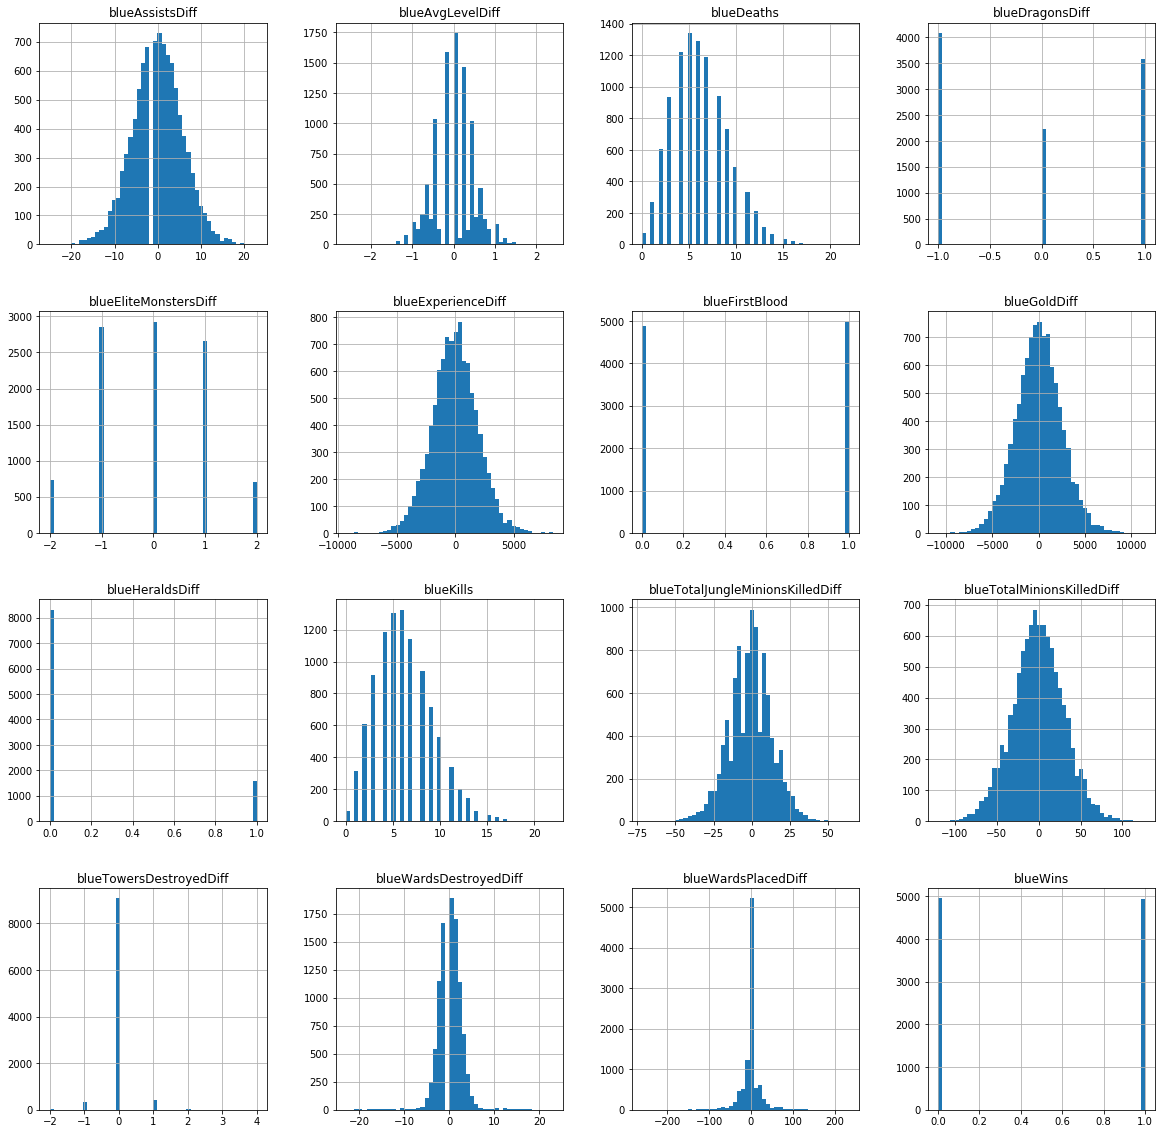

In [20]:
data.hist(bins=50, figsize=(20, 20))
plt.show()

### Correlation Between Features

- Gold difference has major impact in winnig the game
- gold is used to buy item, and get champion more powerful
- exp and average come second since higher level champion deal more damge and get lass damge from other lower level champion
- more assist mean more gold you get from helping teammate kill enemy champion
- blueDeath have higher negative corr as expected

In [21]:
corr_matrix = data.corr()
corr_matrix['blueWins'].sort_values(ascending=False)

blueWins                            1.000000
blueGoldDiff                        0.511119
blueExperienceDiff                  0.489558
blueAvgLevelDiff                    0.452927
blueAssistsDiff                     0.385866
blueKills                           0.337358
blueTotalMinionsKilledDiff          0.309126
blueEliteMonstersDiff               0.259969
blueDragonsDiff                     0.234264
blueFirstBlood                      0.201769
blueTotalJungleMinionsKilledDiff    0.169118
blueTowersDestroyedDiff             0.156179
blueWardsDestroyedDiff              0.075205
blueWardsPlacedDiff                 0.016890
blueHeraldsDiff                    -0.097172
blueDeaths                         -0.339297
Name: blueWins, dtype: float64

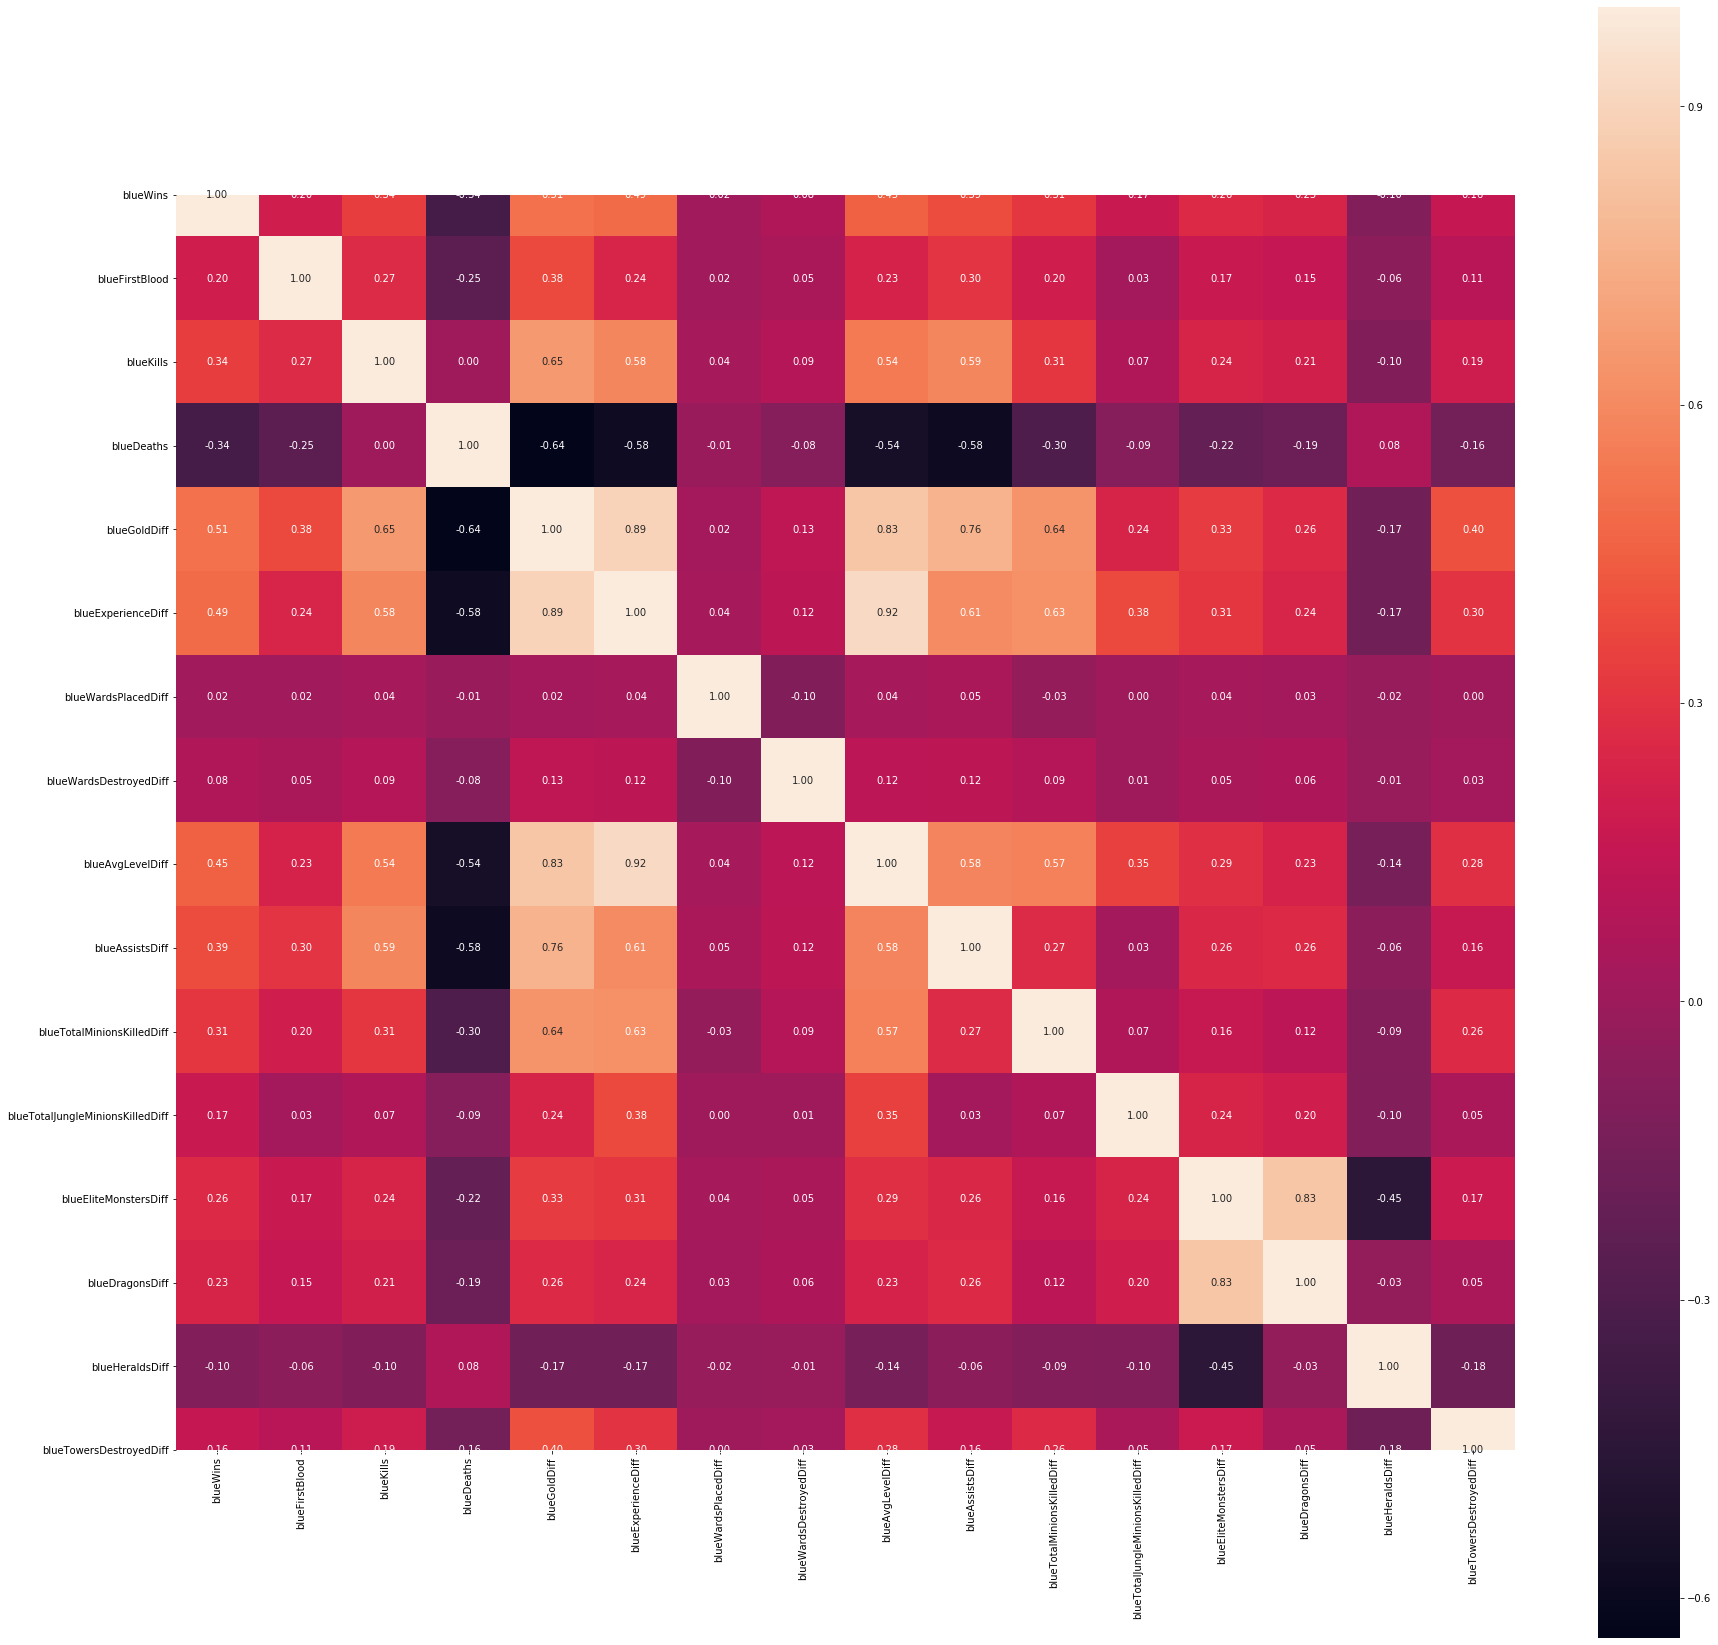

In [22]:
fig = plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, square=True, fmt='.2f')
plt.show()

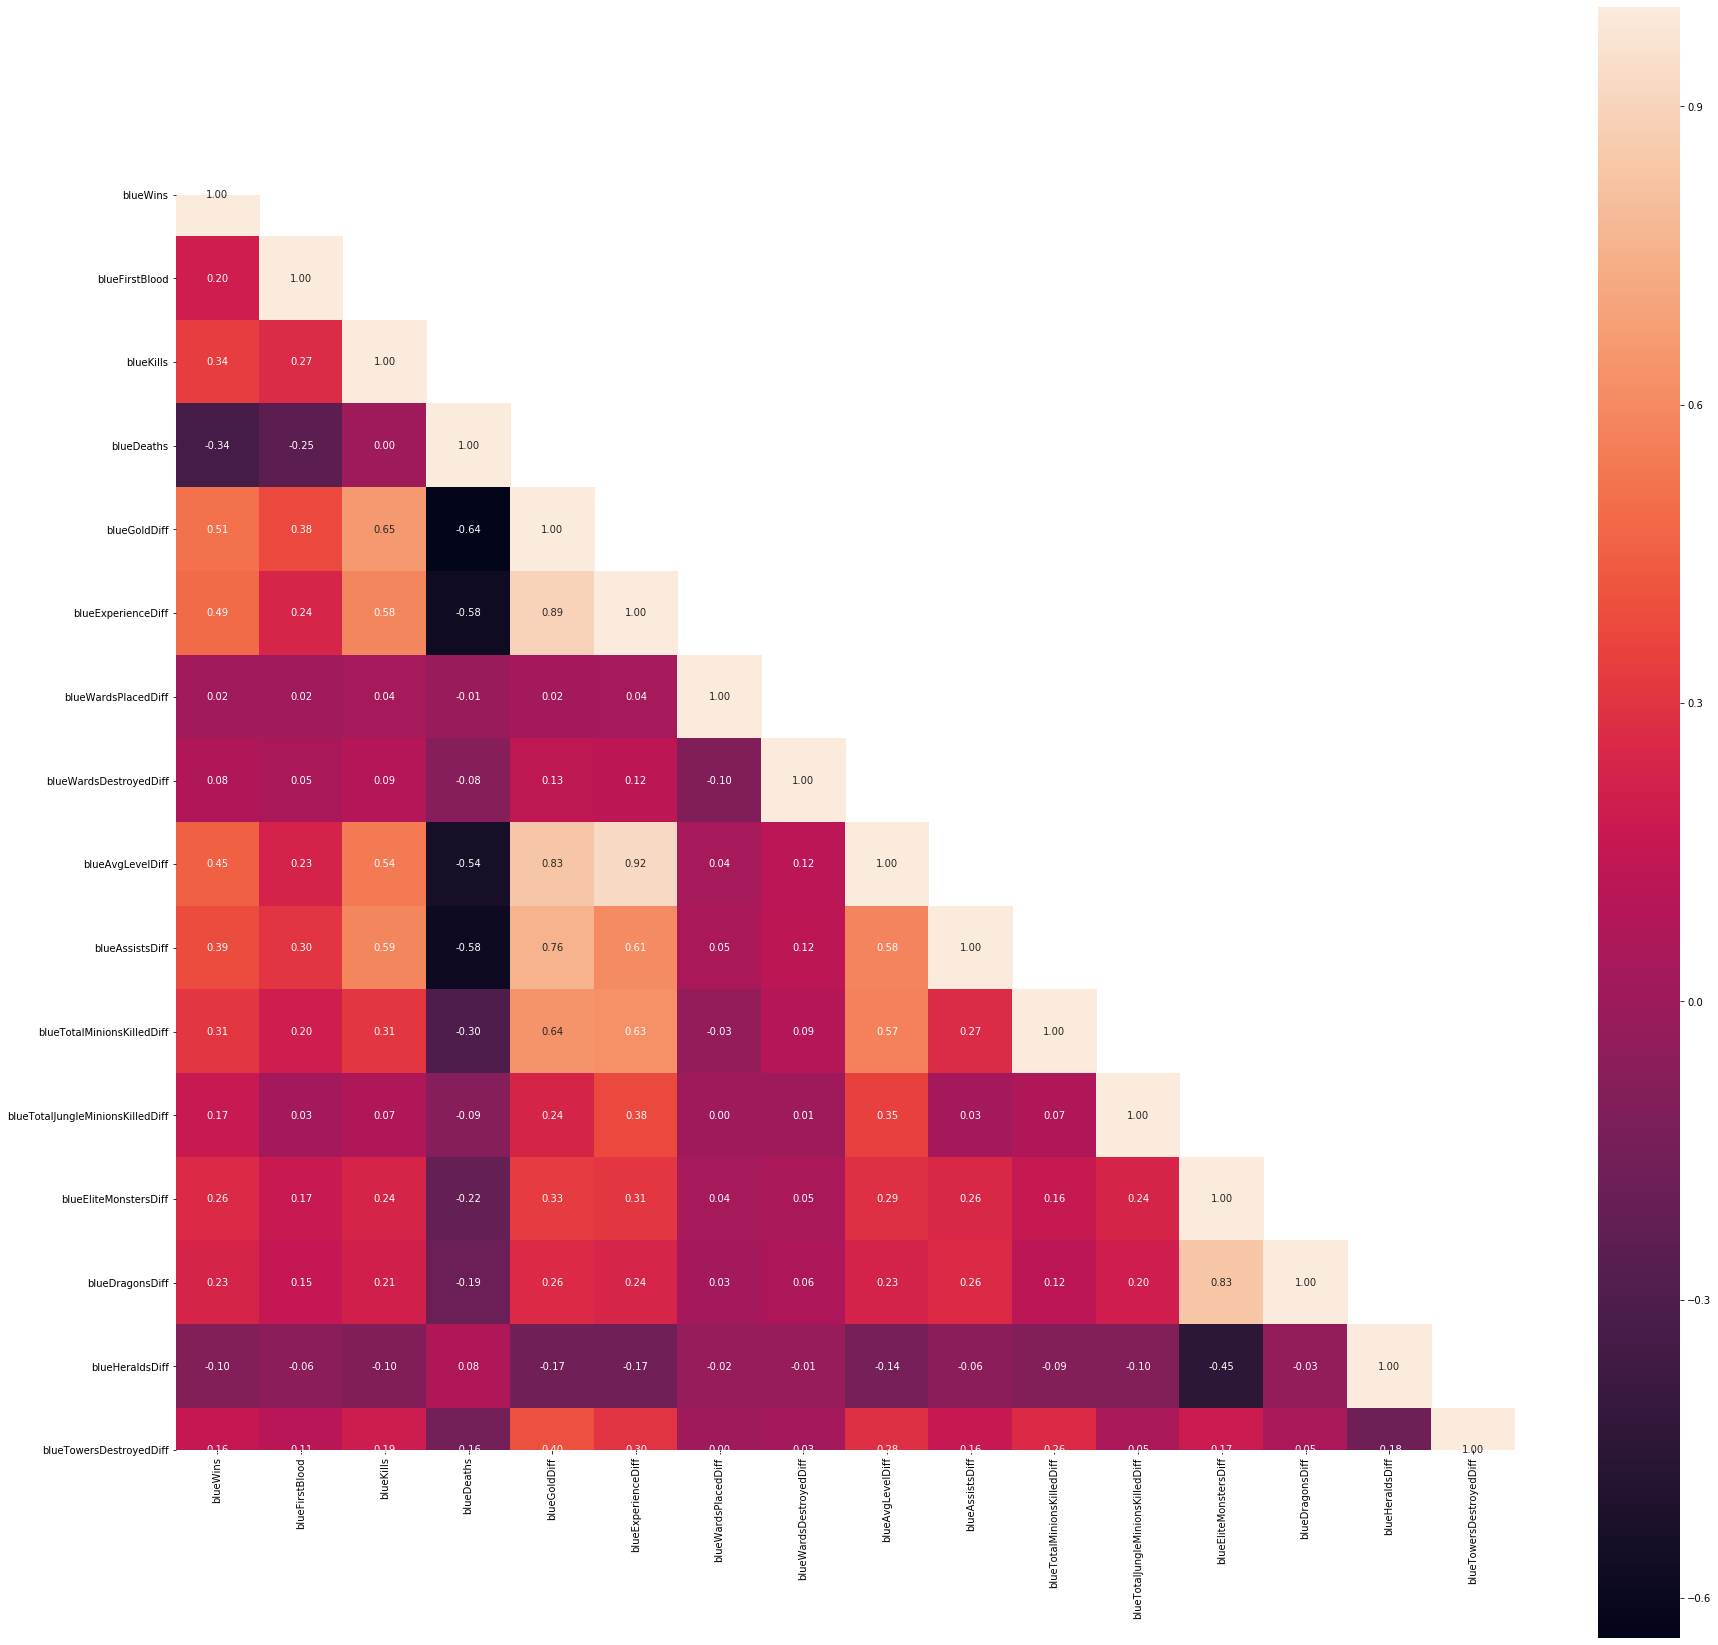

In [38]:
f, ax = plt.subplots(figsize= (30, 30))
corr = data.corr()
lower = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
hmap=sns.heatmap(lower, annot=True, square=True, fmt='.2f')

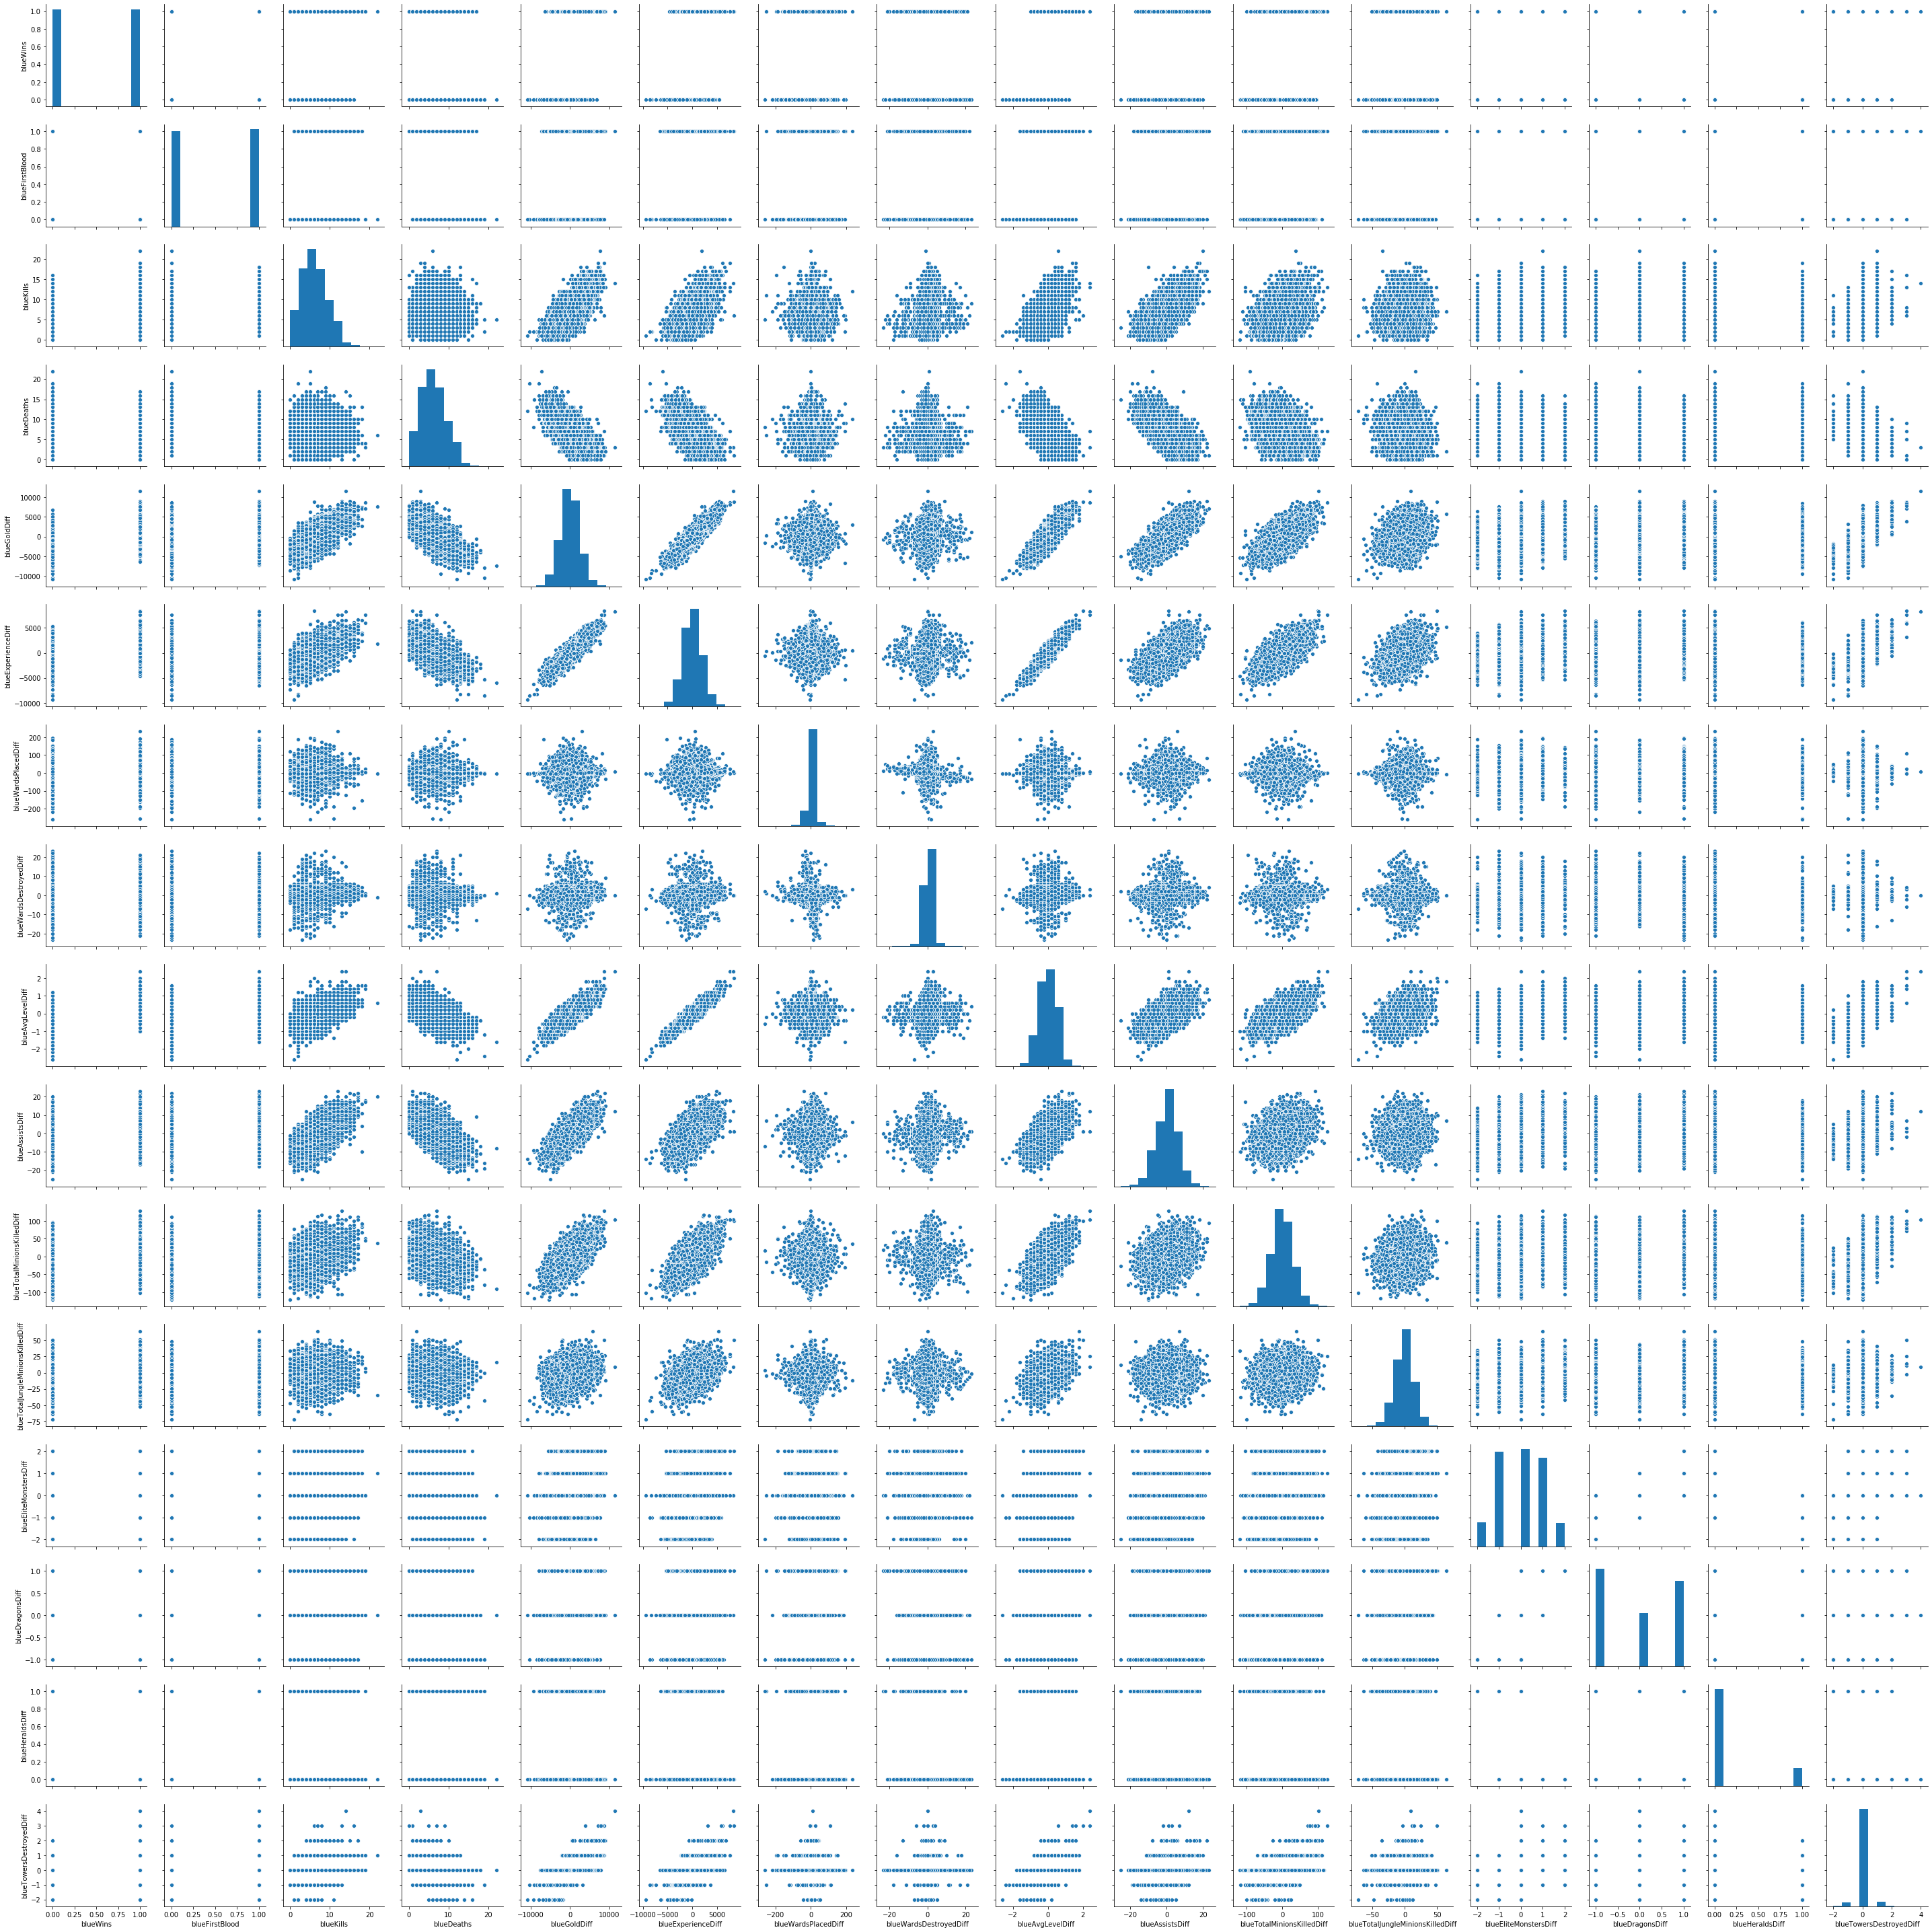

In [23]:
sns.pairplot(data)
plt.tight_layout()
plt.show()

In [24]:
cols = ['blueGoldDiff', 'blueExperienceDiff', 'blueAvgLevelDiff', 'blueAssistsDiff', 'blueKills',  
        'blueTotalMinionsKilledDiff',  'blueEliteMonstersDiff', 'blueDragonsDiff', 'blueFirstBlood',
        'blueTotalJungleMinionsKilledDiff','blueTowersDestroyedDiff', 'blueWardsDestroyedDiff',
        'blueWardsPlacedDiff', 'blueHeraldsDiff', 'blueDeaths']

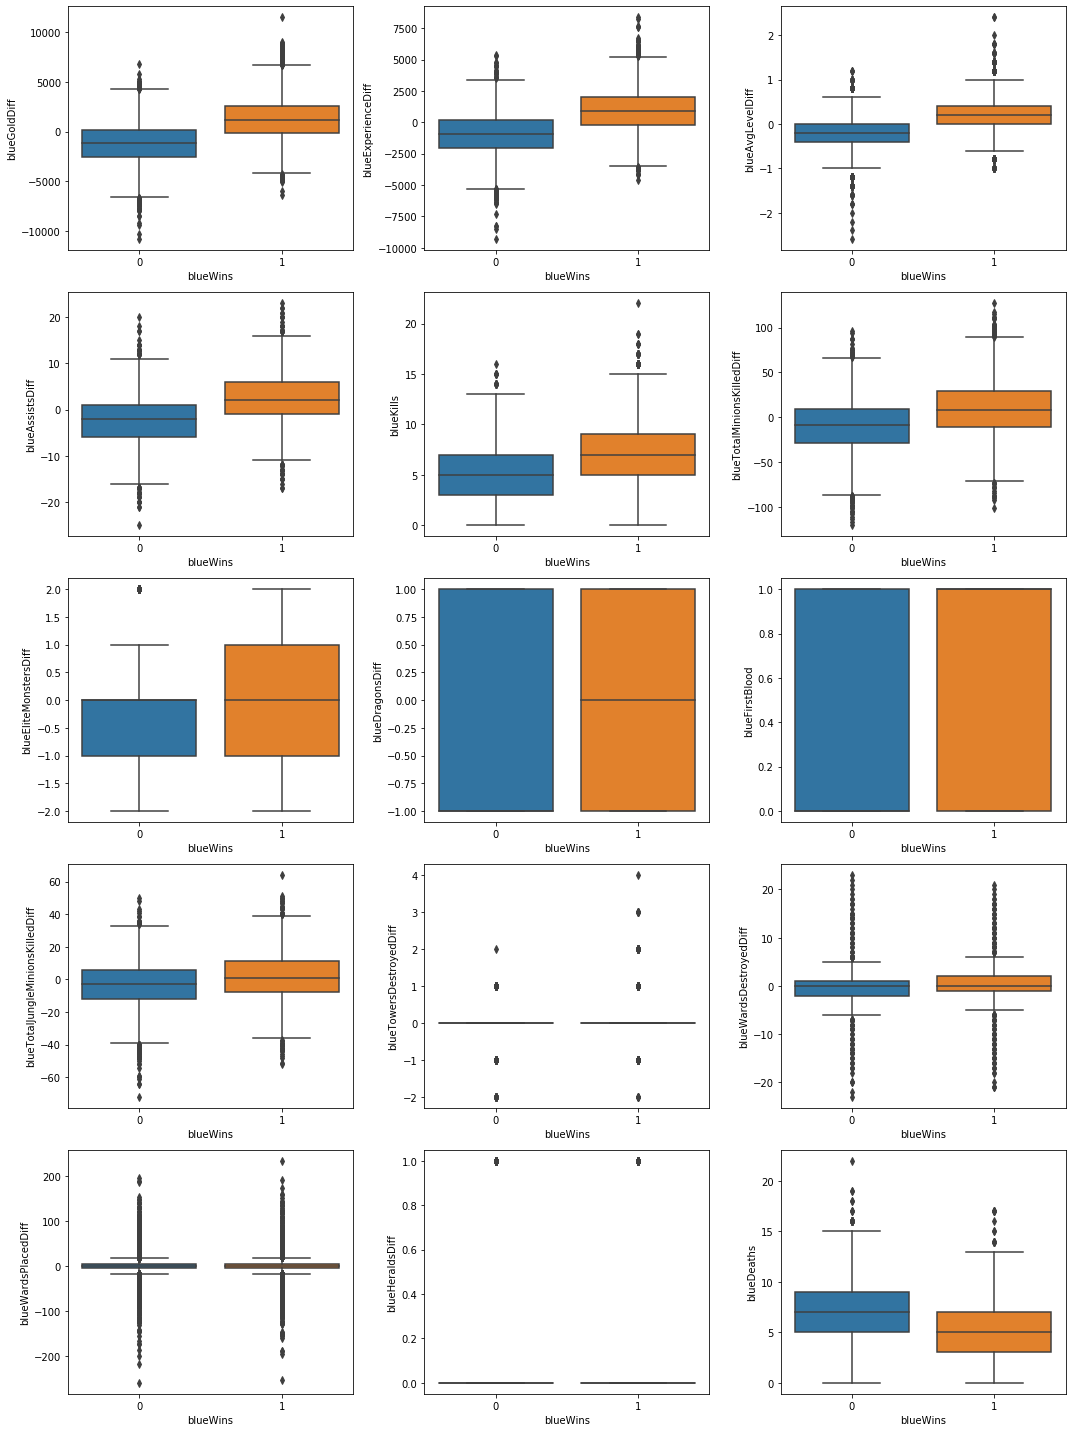

In [25]:
row = (len(cols)/3)
plt.figure(figsize = (15, 20))

for i, col in enumerate(cols):
    plt.subplot(row, 3, i +1)
    sns.boxplot(data['blueWins'], data[col])

plt.tight_layout()

In [26]:
blueFirstBloodWin = len(data[(data['blueWins'] == 1) & (data['blueFirstBlood']==1)]) / len(data[data['blueFirstBlood']==1])
blueFirstBloodLost = len(data[(data['blueWins'] == 0) & (data['blueFirstBlood']== 1)]) / len(data[data['blueFirstBlood']==1])
blueNoFirstBloodWin = len(data[(data['blueWins'] == 1) & (data['blueFirstBlood']==0)]) / len(data[data['blueFirstBlood']==0])
blueNoFirstBloodLost = len(data[(data['blueWins'] == 0) & (data['blueFirstBlood']==0)]) / len(data[data['blueFirstBlood']==0])

In [27]:
data.head()

,blueWins,blueFirstBlood,blueKills,blueDeaths,blueGoldDiff,blueExperienceDiff,blueWardsPlacedDiff,blueWardsDestroyedDiff,blueAvgLevelDiff,blueAssistsDiff,blueTotalMinionsKilledDiff,blueTotalJungleMinionsKilledDiff,blueEliteMonstersDiff,blueDragonsDiff,blueHeraldsDiff,blueTowersDestroyedDiff
0,0,1,9,6,643,-8,13,-4,-0.2,3,-2,-19,0,0,0,0
1,0,0,5,5,-2908,-1173,0,0,-0.2,3,-66,-9,-2,-1,1,-1
2,0,0,7,11,-1172,-1033,0,-3,-0.4,-10,-17,18,1,1,0,0
3,0,0,4,5,-1321,-7,28,-1,0.0,-5,-34,8,1,0,0,0
4,0,0,6,6,-1004,230,58,2,0.0,-1,-15,-10,-1,-1,0,0


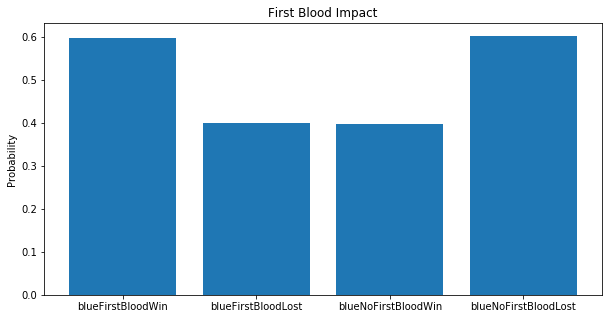

In [28]:
objects = ('blueFirstBloodWin', 'blueFirstBloodLost', 'blueNoFirstBloodWin', 'blueNoFirstBloodLost')
y_pos = np.arange(len(objects))
performance = [blueFirstBloodWin, blueFirstBloodLost, blueNoFirstBloodWin, blueNoFirstBloodLost]

plt.figure(figsize=(10,5))
plt.bar(y_pos, performance)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('First Blood Impact')
plt.show()

| Feature | Corr. Value |
| ------- | ----- |
|blueGoldDiff|                        0.511119|
|blueExperienceDiff|                  0.489558|
|blueAvgLevelDiff|                    0.452927|
|blueAssistsDiff|                     0.385866|
|blueKills|                           0.337358|
|blueTotalMinionsKilledDiff|          0.309126|
|blueEliteMonstersDiff|               0.259969|
|blueTotalJungleMinionsKilledDiff|    0.169118|
|blueTowersDestroyedDiff|             0.156179|
|blueWardsDestroyedDiff|              0.075205|
|blueWardsPlacedDiff|                 0.016890|
|blueHeraldsDiff|                    -0.097172|
|blueDeaths|                         -0.339297|

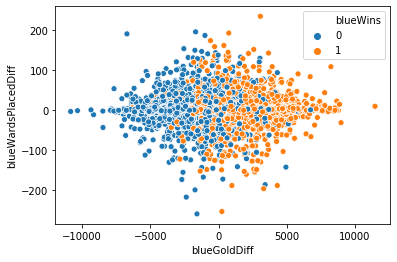

In [29]:
sns.scatterplot(x = 'blueGoldDiff', y = 'blueWardsPlacedDiff', hue = 'blueWins', data=data)
plt.show()

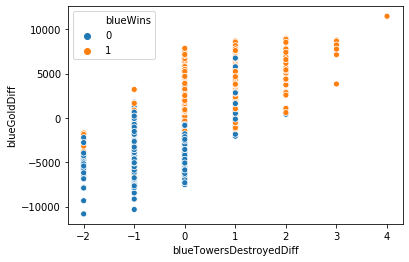

In [30]:
sns.scatterplot(y = 'blueGoldDiff', x = 'blueTowersDestroyedDiff', hue = 'blueWins', data=data)
plt.show()

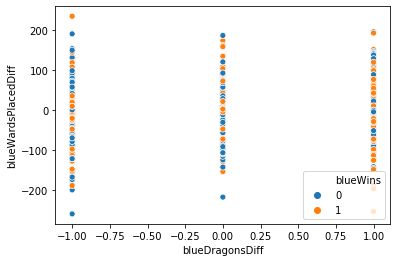

In [31]:
sns.scatterplot(x = 'blueDragonsDiff', y = 'blueWardsPlacedDiff', hue = 'blueWins', data=data)
plt.show()

In [32]:
blueMoreWardWin = len(data[(data['blueWardsPlacedDiff'] > 0) & (data['blueWins'] == 1)]) / len(data[data['blueWins'] == 1])
blueLessWardWin =  len(data[(data['blueWardsPlacedDiff'] < 0)& (data['blueWins'] == 1)]) / len(data[data['blueWins'] == 1])
blueLessWardLose = len(data[(data['blueWardsPlacedDiff'] < 0) & (data['blueWins'] == 0)])  / len(data[data['blueWins'] == 0])
blueMoreWardLose = len(data[(data['blueWardsPlacedDiff'] > 0) & (data['blueWins'] == 0)]) / len(data[data['blueWins'] == 0])

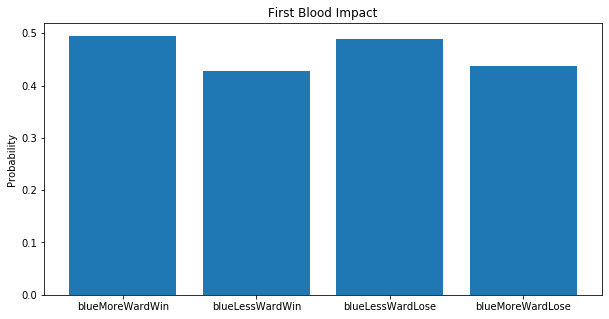

In [33]:
objects = ('blueMoreWardWin', 'blueLessWardWin', 'blueLessWardLose', 'blueMoreWardLose')
y_pos = np.arange(len(objects))
performance = [blueMoreWardWin, blueLessWardWin, blueLessWardLose, blueMoreWardLose]

plt.figure(figsize=(10,5))
plt.bar(y_pos, performance)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('First Blood Impact')
plt.show()

### Train Test Split

> Splitting data for Classification and other transformation

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
y = data['blueWins']
X = data.loc[:, data.columns != 'blueWins']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [46]:
test_df = pd.concat([X_test, y_test], axis=1)

In [47]:
train_df = pd.concat([X_train, y_train], axis=1)

In [48]:
train_df.to_csv('train.csv')
test_df.to_csv('test.csv')

- Train test split to perform classification